In [3]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.optim.lr_scheduler import StepLR
import torchvision
import numpy as np
from dataset import *
from backpropagation import *
from model import CNNModel
from utils import print_summary
from visualize import *
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings("ignore")

import torchvision
!pip install torchview
from torchview import draw_graph
import graphviz

In [4]:
# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)
device = torch.device("cuda" if cuda else "cpu")

CUDA Available? True


In [5]:


# Loading test and train data & dataloader
cifar10 = dataset_cifar10(batch_size=128)

# Train dataloader
trainloader = cifar10.loader(train_flag=True)

# Test dataloader
testloader = cifar10.loader(train_flag=False)

classes = cifar10.classes

CUDA availability ? True


100%|██████████| 170498071/170498071 [00:17<00:00, 9902796.04it/s]


Extracting ./Data/cifar-10-python.tar.gz to ./Data
Files already downloaded and verified


Files already downloaded and verified


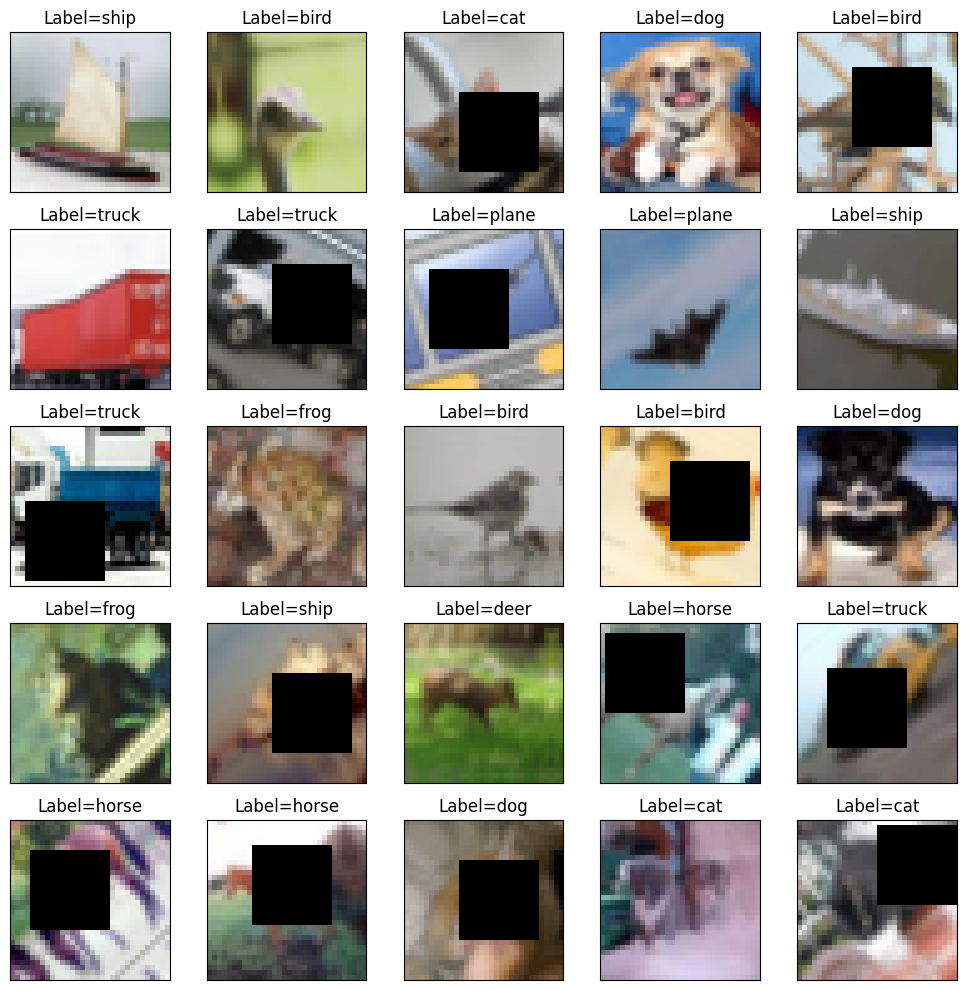

In [6]:
cifar10.sample_pictures(train_flag=True)

In [7]:
# Loading Custom Model
cnn_model = CNNModel()

# Sending network to device
model = cnn_model.to(device)

In [8]:
print_summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             864
              ReLU-2           [-1, 32, 32, 32]               0
       BatchNorm2d-3           [-1, 32, 32, 32]              64
            Conv2d-4          [-1, 160, 32, 32]           5,120
              ReLU-5          [-1, 160, 32, 32]               0
       BatchNorm2d-6          [-1, 160, 32, 32]             320
            Conv2d-7          [-1, 160, 32, 32]           1,440
              ReLU-8          [-1, 160, 32, 32]               0
       BatchNorm2d-9          [-1, 160, 32, 32]             320
           Conv2d-10           [-1, 32, 32, 32]           5,120
             ReLU-11           [-1, 32, 32, 32]               0
      BatchNorm2d-12           [-1, 32, 32, 32]              64
          Dropout-13           [-1, 32, 32, 32]               0
           Conv2d-14           [-1, 32,

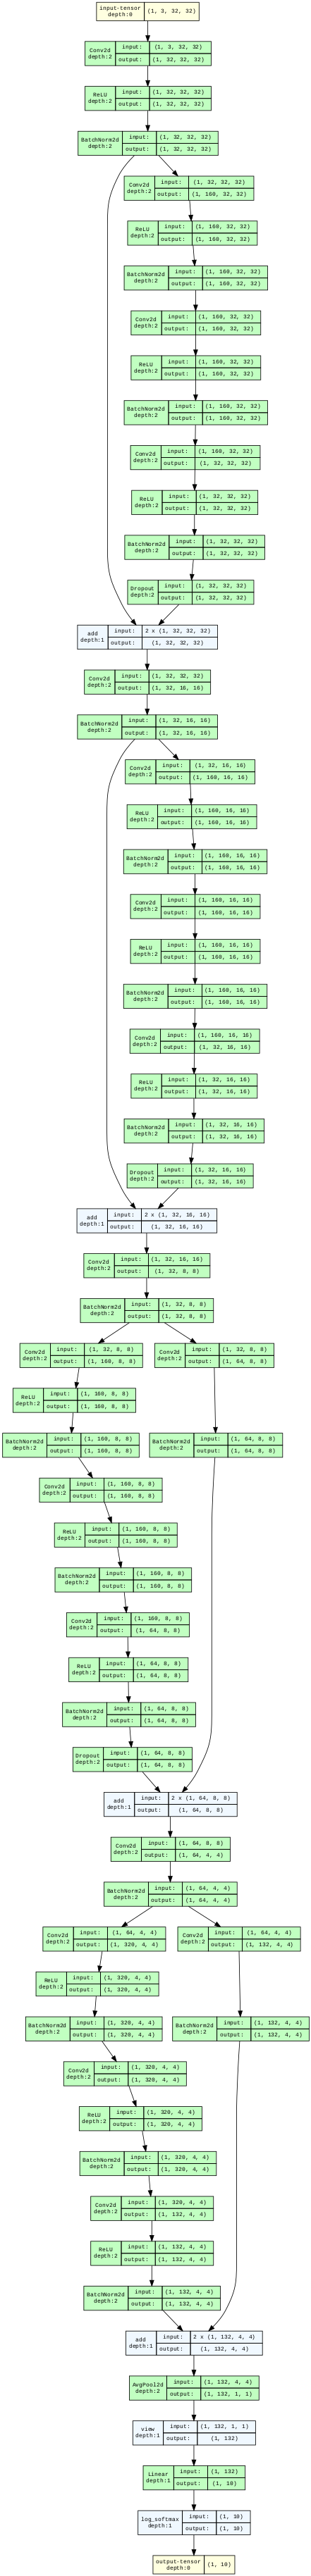

In [9]:
graphviz.set_jupyter_format('png')
model_graph = draw_graph(CNNModel(), input_size=(1,3,32,32), expand_nested=False)
model_graph.visual_graph

In [8]:
train_losses=[]
test_losses=[]
train_acc= []
test_acc= []

In [9]:
optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
scheduler = StepLR(optimizer, step_size=6, gamma=0.2)
EPOCHS = 25
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train_acc,train_losses=train(model, device, trainloader, optimizer, epoch,train_acc,train_losses)
    test_acc,test_losses=test(model, device, testloader,test_acc,test_losses)

EPOCH: 0


Loss=1.3156054019927979 Batch_id=390 Accuracy=43.81: 100%|██████████| 391/391 [00:20<00:00, 18.75it/s]



Test set: Average loss: 1.1188, Accuracy: 6038/10000 (60.38%)

EPOCH: 1


Loss=1.231472373008728 Batch_id=390 Accuracy=56.31: 100%|██████████| 391/391 [00:20<00:00, 19.35it/s]



Test set: Average loss: 0.9782, Accuracy: 6494/10000 (64.94%)

EPOCH: 2


Loss=0.9525799751281738 Batch_id=390 Accuracy=60.84: 100%|██████████| 391/391 [00:18<00:00, 20.64it/s]



Test set: Average loss: 0.8253, Accuracy: 7114/10000 (71.14%)

EPOCH: 3


Loss=1.070061445236206 Batch_id=390 Accuracy=64.05: 100%|██████████| 391/391 [00:18<00:00, 20.75it/s]



Test set: Average loss: 0.7924, Accuracy: 7258/10000 (72.58%)

EPOCH: 4


Loss=0.9134027361869812 Batch_id=390 Accuracy=66.21: 100%|██████████| 391/391 [00:20<00:00, 19.43it/s]



Test set: Average loss: 0.7345, Accuracy: 7479/10000 (74.79%)

EPOCH: 5


Loss=0.9380553364753723 Batch_id=390 Accuracy=68.12: 100%|██████████| 391/391 [00:18<00:00, 20.72it/s]



Test set: Average loss: 0.6604, Accuracy: 7716/10000 (77.16%)

EPOCH: 6


Loss=0.7564642429351807 Batch_id=390 Accuracy=69.51: 100%|██████████| 391/391 [00:18<00:00, 20.85it/s]



Test set: Average loss: 0.6255, Accuracy: 7814/10000 (78.14%)

EPOCH: 7


Loss=0.9048473238945007 Batch_id=390 Accuracy=70.81: 100%|██████████| 391/391 [00:20<00:00, 19.47it/s]



Test set: Average loss: 0.6243, Accuracy: 7852/10000 (78.52%)

EPOCH: 8


Loss=0.890572726726532 Batch_id=390 Accuracy=71.58: 100%|██████████| 391/391 [00:18<00:00, 20.76it/s]



Test set: Average loss: 0.5936, Accuracy: 7972/10000 (79.72%)

EPOCH: 9


Loss=1.0838863849639893 Batch_id=390 Accuracy=72.69: 100%|██████████| 391/391 [00:18<00:00, 20.80it/s]



Test set: Average loss: 0.5858, Accuracy: 7975/10000 (79.75%)

EPOCH: 10


Loss=0.6716275811195374 Batch_id=390 Accuracy=72.97: 100%|██████████| 391/391 [00:19<00:00, 19.71it/s]



Test set: Average loss: 0.5259, Accuracy: 8156/10000 (81.56%)

EPOCH: 11


Loss=0.7616040110588074 Batch_id=390 Accuracy=73.50: 100%|██████████| 391/391 [00:18<00:00, 20.83it/s]



Test set: Average loss: 0.5516, Accuracy: 8123/10000 (81.23%)

EPOCH: 12


Loss=0.7240789532661438 Batch_id=390 Accuracy=74.50: 100%|██████████| 391/391 [00:19<00:00, 19.87it/s]



Test set: Average loss: 0.5051, Accuracy: 8257/10000 (82.57%)

EPOCH: 13


Loss=0.6966513395309448 Batch_id=390 Accuracy=74.92: 100%|██████████| 391/391 [00:19<00:00, 19.72it/s]



Test set: Average loss: 0.5063, Accuracy: 8271/10000 (82.71%)

EPOCH: 14


Loss=0.6671422719955444 Batch_id=390 Accuracy=75.21: 100%|██████████| 391/391 [00:19<00:00, 20.51it/s]



Test set: Average loss: 0.5115, Accuracy: 8276/10000 (82.76%)

EPOCH: 15


Loss=0.7552340626716614 Batch_id=390 Accuracy=75.95: 100%|██████████| 391/391 [00:18<00:00, 20.96it/s]



Test set: Average loss: 0.4866, Accuracy: 8302/10000 (83.02%)

EPOCH: 16


Loss=0.46550053358078003 Batch_id=390 Accuracy=76.72: 100%|██████████| 391/391 [00:19<00:00, 19.66it/s]



Test set: Average loss: 0.4707, Accuracy: 8379/10000 (83.79%)

EPOCH: 17


Loss=0.744552731513977 Batch_id=390 Accuracy=76.61: 100%|██████████| 391/391 [00:18<00:00, 20.84it/s]



Test set: Average loss: 0.4784, Accuracy: 8366/10000 (83.66%)

EPOCH: 18


Loss=0.6969953179359436 Batch_id=390 Accuracy=76.89: 100%|██████████| 391/391 [00:19<00:00, 20.57it/s]



Test set: Average loss: 0.4590, Accuracy: 8448/10000 (84.48%)

EPOCH: 19


Loss=0.8309234380722046 Batch_id=390 Accuracy=77.66: 100%|██████████| 391/391 [00:20<00:00, 19.47it/s]



Test set: Average loss: 0.4706, Accuracy: 8410/10000 (84.10%)

EPOCH: 20


Loss=0.6827611327171326 Batch_id=390 Accuracy=77.49: 100%|██████████| 391/391 [00:19<00:00, 19.92it/s]



Test set: Average loss: 0.4591, Accuracy: 8404/10000 (84.04%)

EPOCH: 21


Loss=0.713283360004425 Batch_id=390 Accuracy=77.69: 100%|██████████| 391/391 [00:19<00:00, 20.55it/s]



Test set: Average loss: 0.4406, Accuracy: 8495/10000 (84.95%)

EPOCH: 22


Loss=0.596083402633667 Batch_id=390 Accuracy=78.21: 100%|██████████| 391/391 [00:20<00:00, 19.38it/s]



Test set: Average loss: 0.4500, Accuracy: 8450/10000 (84.50%)

EPOCH: 23


Loss=0.6029220819473267 Batch_id=390 Accuracy=78.38: 100%|██████████| 391/391 [00:21<00:00, 18.41it/s]



Test set: Average loss: 0.4332, Accuracy: 8483/10000 (84.83%)

EPOCH: 24


Loss=0.5489422082901001 Batch_id=390 Accuracy=78.82: 100%|██████████| 391/391 [00:19<00:00, 20.41it/s]



Test set: Average loss: 0.4353, Accuracy: 8528/10000 (85.28%)



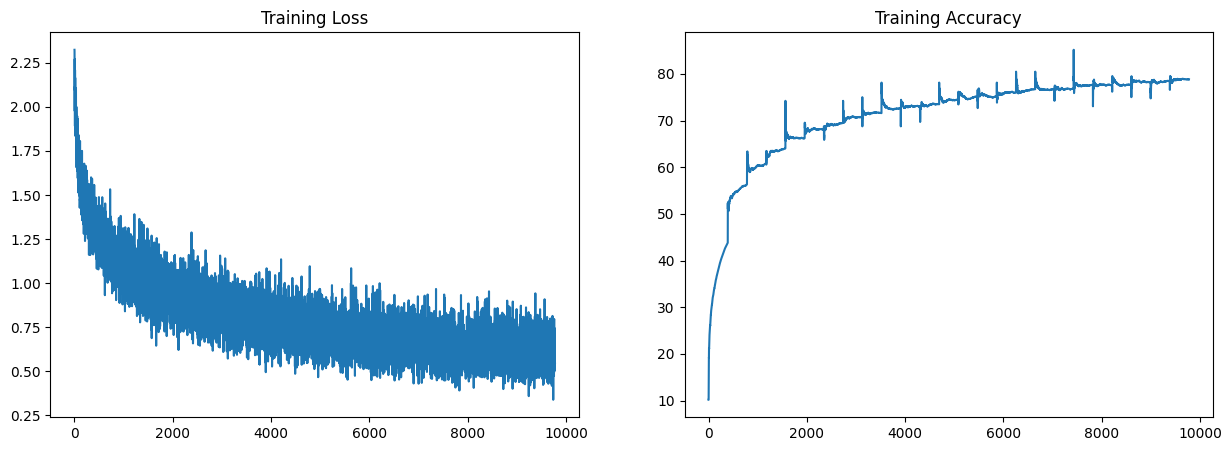

In [10]:
train_plot_stats(train_losses,train_acc)

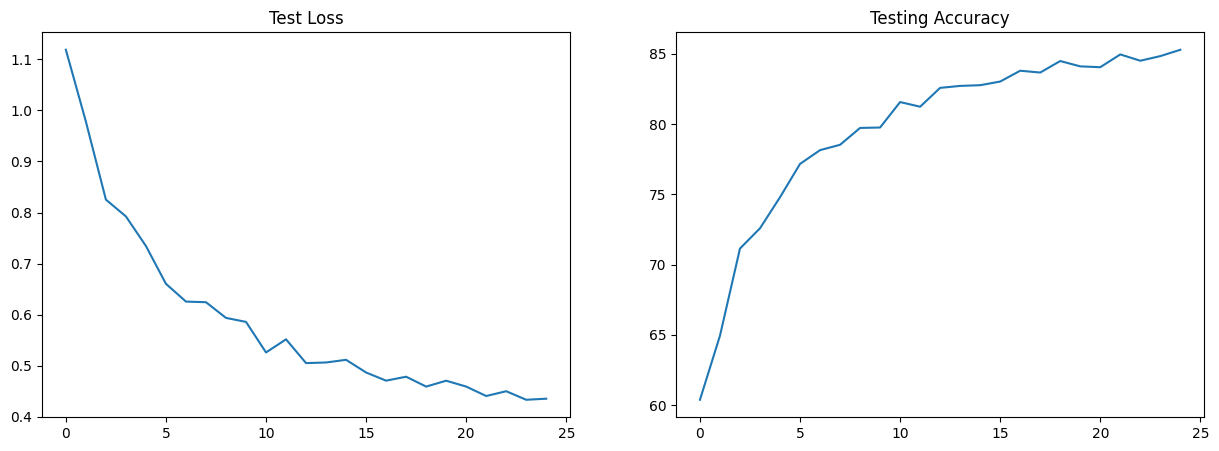

In [11]:
test_plot_stats(test_losses,test_acc)

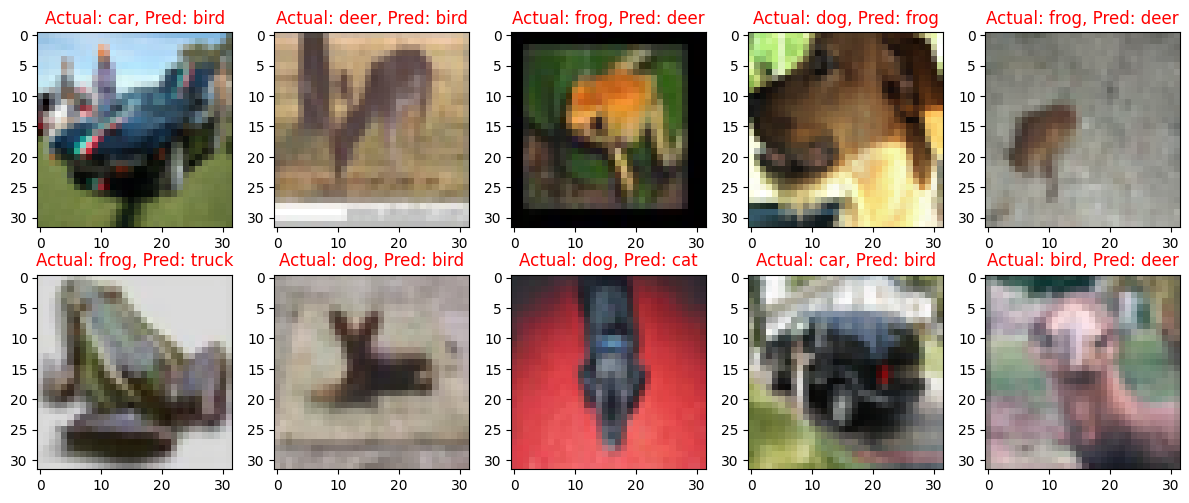

In [12]:
plot_misclassified_images(model, testloader, classes, device)